In [2]:
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data Çfiles

## Data processing

In [3]:
os.getcwd()

'C:\\Users\\david\\OneDrive\\Documentos\\GitHub\\OpenBrains\\Diana_analysis'

In [19]:
#Load data and get sheet names
#filepath = 'C:\\Users\\david\\Documents\\Open Brains\\Balanced Brains\\diana_results\\test_feedback_f2.xlsx'
#filepath = 'C:\\Users\\david\\Downloads\\Feedback experiment David.xlsx'
filepath = 'C:\\Users\\david\\Downloads\\Feedback experiment David (4).xlsx'

xl = pd.ExcelFile(filepath)
sheet_names = xl.sheet_names
print(sheet_names)

['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10']


In [20]:
#Get summary dataframe

summary=[]

for idx, group in enumerate(sheet_names):
    
    df_gx = pd.read_excel(filepath, sheet_name=sheet_names[idx])
    
    if not df_gx.iloc[:,1].isnull().iloc[1]:
        
        for idx1, label in enumerate(['càstig', 'recompensa', 'guiatge']): ##each feedback type
            
            points = df_gx.iloc[1:, 1+idx1][~df_gx.iloc[1:, 1+idx1].isnull()].values ## remove the nan and convert to array
            
            print([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ]) ##control mechanism
            
            summary.append([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ])
            #
            
#
df = pd.DataFrame(summary)
df.columns=['sum', 'mean_points', '#thorws', 'feedback_type', 'group' ]    
            

[300, 8.82, 34, 'càstig', 'G01']
[720, 24.0, 30, 'recompensa', 'G01']
[790, 24.69, 32, 'guiatge', 'G01']
[600, 16.67, 36, 'càstig', 'G02']
[680, 28.33, 24, 'recompensa', 'G02']
[700, 25.93, 27, 'guiatge', 'G02']
[770, 30.8, 25, 'càstig', 'G03']
[330, 14.35, 23, 'recompensa', 'G03']
[950, 30.65, 31, 'guiatge', 'G03']
[70, 2.8, 25, 'càstig', 'G04']
[770, 20.81, 37, 'recompensa', 'G04']
[2070, 53.08, 39, 'guiatge', 'G04']
[1030, 35.52, 29, 'càstig', 'G05']
[330, 13.75, 24, 'recompensa', 'G05']
[1540, 40.53, 38, 'guiatge', 'G05']
[670, 51.54, 13, 'càstig', 'G06']
[170, 13.08, 13, 'recompensa', 'G06']
[490, 37.69, 13, 'guiatge', 'G06']
[300, 15.79, 19, 'càstig', 'G07']
[330, 19.41, 17, 'recompensa', 'G07']
[990, 24.75, 40, 'guiatge', 'G07']
[200, 12.5, 16, 'càstig', 'G08']
[770, 25.67, 30, 'recompensa', 'G08']
[80, 3.48, 23, 'guiatge', 'G08']


In [21]:
df

,sum,mean_points,#thorws,feedback_type,group
0,300,8.82,34,càstig,G01
1,720,24.00,30,recompensa,G01
2,790,24.69,32,guiatge,G01
3,600,16.67,36,càstig,G02
4,680,28.33,24,recompensa,G02
5,700,25.93,27,guiatge,G02
6,770,30.80,25,càstig,G03
7,330,14.35,23,recompensa,G03
8,950,30.65,31,guiatge,G03
9,70,2.80,25,càstig,G04


## Plots

In [22]:
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns
sns.set_context("talk")

In [23]:
c_guiatge =  '#e59500'
c_recompensa= 'aquamarine' # '#002642'
c_castig= 'indianred'  # '#840032'

C:\Users\david\AppData\Local\Temp\ipykernel_19496\1021076340.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


Text(0.5, 1.0, 'Eficiència')

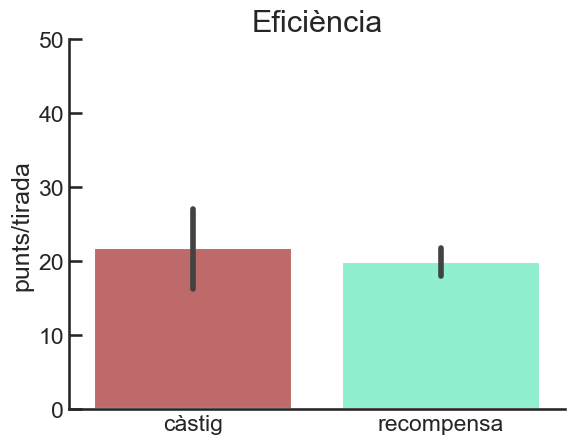

In [24]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,50)
plt.xlabel('')
plt.ylabel('punts/tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_19496\4018339294.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


Text(0.5, 1.0, 'Eficiència')

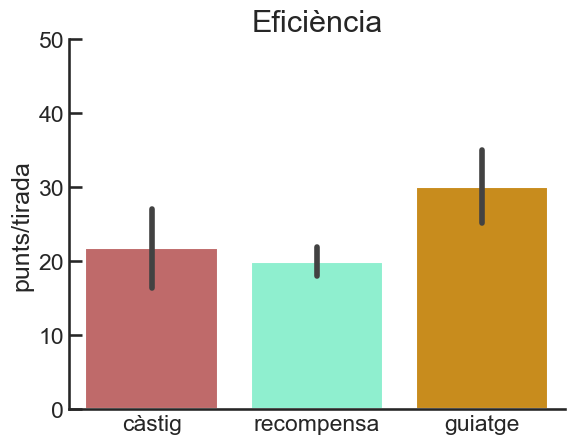

In [25]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,50)
plt.xlabel('')
plt.ylabel('punts/tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_19496\3090455412.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="sum",


Text(0.5, 1.0, 'Total')

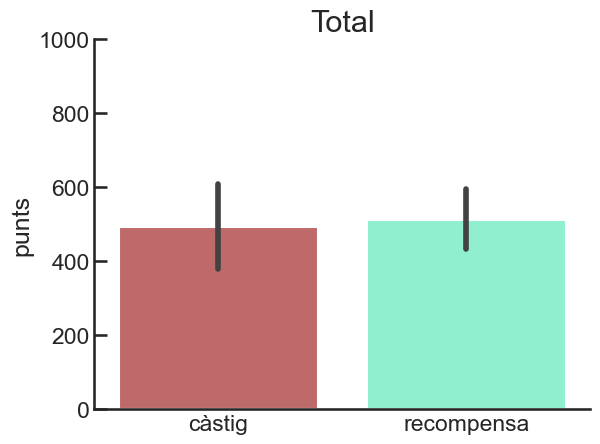

In [26]:
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,1000)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Total', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_19496\177140364.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="sum",


Text(0.5, 1.0, 'Total')

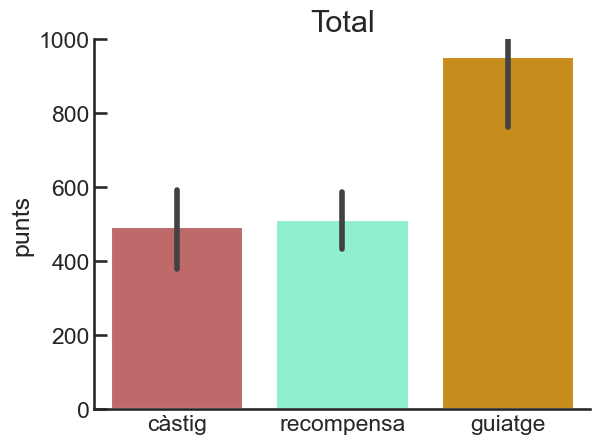

In [27]:
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,1000)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Total', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_19496\3265940609.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


Text(0.5, 1.0, 'Eficiència')

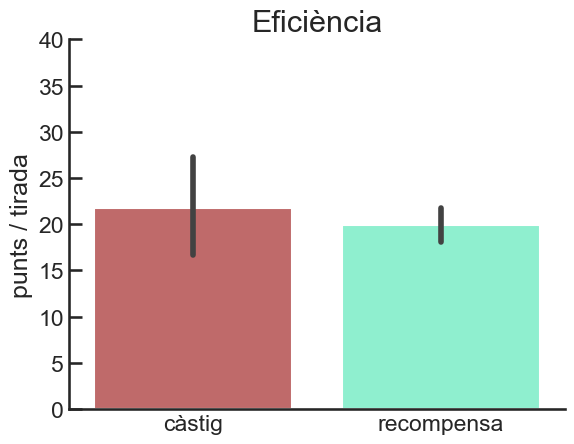

In [28]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_19496\4033082248.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


Text(0.5, 1.0, 'Eficiència')

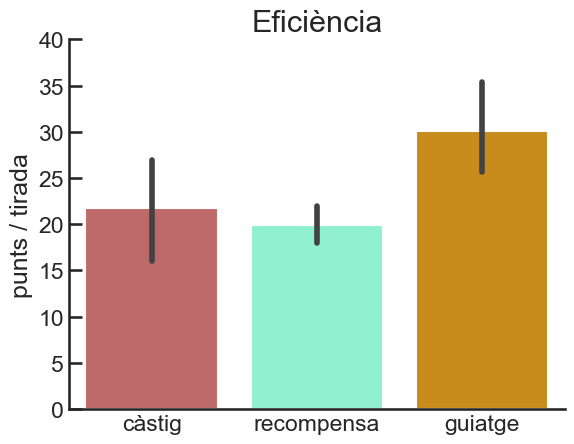

In [29]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_19496\892595583.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="sum",
C:\Users\david\AppData\Local\Temp\ipykernel_19496\892595583.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="#thorws",
C:\Users\david\AppData\Local\Temp\ipykernel_19496\892595583.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


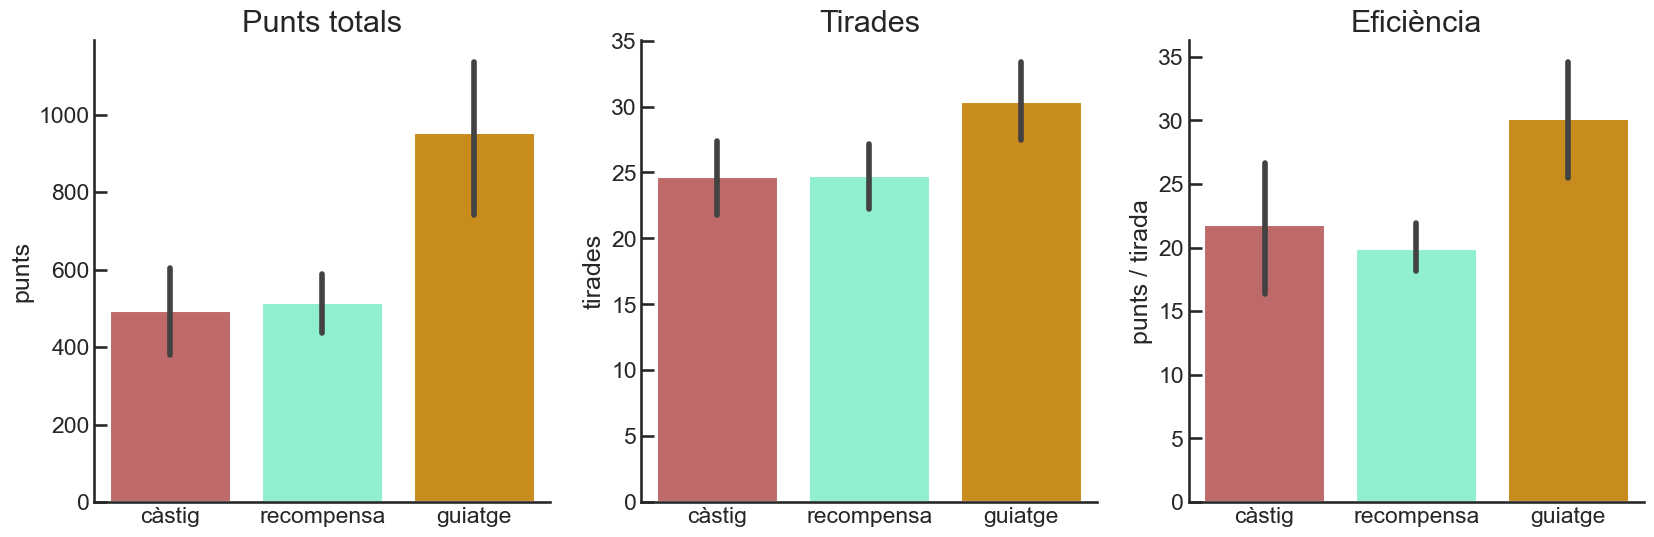

In [30]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Punts totals', fontsize=22)


plt.subplot(132)
sns.barplot(data=df, x="feedback_type", y="#thorws", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('tirades');
plt.title('Tirades', fontsize=22)


plt.subplot(133)
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


In [31]:
from linares_plot import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


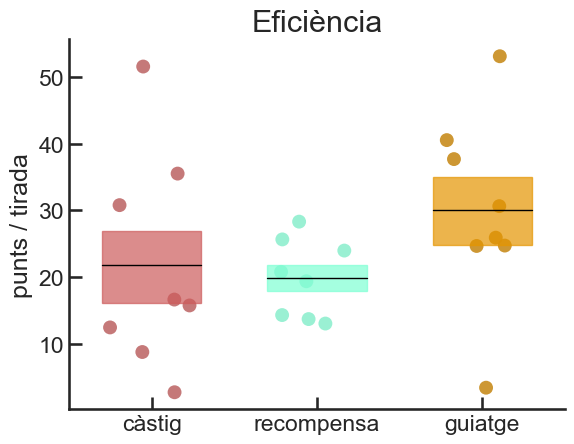

In [32]:
sns.set_context("talk")

linares_plot(x='feedback_type', y='mean_points', order=['càstig', 'recompensa', 'guiatge'], 
             df=df, palette=[c_castig, c_recompensa, c_guiatge], CI=0.68,  fill_box=True, by_subj=True, subj_col='group', 
             reps=500, alpha_box=0.7, alpha=0.9,  point_size=10, leg=False, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


## Stats

In [33]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
###### Anova model
mod = ols(formula='mean_points ~ feedback_type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['mean_points'].values, groups=df['feedback_type'].values,  alpha=0.05)
print( tukey.summary()    )



                                 
                                 Anova Table
                    sum_sq    df         F    PR(>F)
feedback_type   468.992133   2.0  1.387879  0.271576
Residual       3548.161400  21.0       NaN       NaN
                                 
                                 
                                 
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
 càstig    guiatge    8.295 0.4236  -8.0868 24.6768  False
 càstig recompensa    -1.88  0.955 -18.2618 14.5018  False
guiatge recompensa  -10.175 0.2821 -26.5568  6.2068  False
----------------------------------------------------------
